In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
df=pd.read_csv('Train_data.csv')
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [353]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [354]:
df['year']= df['release_date'].dt.year
df['month']= df['release_date'].dt.month
df['day']= df['release_date'].dt.day

In [355]:
df=df.drop(columns='release_date')
#df=df.drop(columns='id')
df=df.drop(columns='day')

In [356]:
df=df.drop(columns='loudness')

In [357]:
df.loc[df['tempo']==0]

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,mode,speechiness,tempo,valence,year,duration-min,popularity,month
952,621,0.94400,0.0,0.000020,No,0.8690,2,0.1120,Minor,0.0,0.0,0.0,2017,2.3,high,10
996,7284,0.87700,0.0,0.791000,No,0.8620,10,0.0548,Major,0.0,0.0,0.0,1947,0.2,very low,1
1487,4322,0.93600,0.0,0.202000,No,0.0137,6,0.1200,Major,0.0,0.0,0.0,1935,3.5,very low,1
2256,10228,0.00209,0.0,0.861000,No,0.0000,11,0.2000,Minor,0.0,0.0,0.0,2012,0.2,very low,9
2933,10069,0.96000,0.0,0.000261,No,0.2030,1,0.1110,Major,0.0,0.0,0.0,2019,2.2,high,11
3034,14632,0.90800,0.0,0.001250,No,1.0000,1,0.1110,Major,0.0,0.0,0.0,2017,1.2,high,8
4420,2342,0.11900,0.0,0.601000,No,0.7710,4,0.9680,Minor,0.0,0.0,0.0,2012,4.0,high,7
6205,14749,0.82700,0.0,0.553000,No,0.0000,0,0.2780,Minor,0.0,0.0,0.0,2018,0.2,very low,3
6564,6684,0.39400,0.0,0.001480,No,1.0000,5,0.1110,Major,0.0,0.0,0.0,2018,2.7,high,11
7735,10026,0.11600,0.0,0.712000,No,0.9980,1,0.7680,Major,0.0,0.0,0.0,2017,2.5,high,9


In [358]:
df_maxtempo = df['tempo'].max()
df['tempo']= df['tempo'] / df_maxtempo

In [359]:
df['tempo']

0        0.511144
1        0.701272
2        0.498075
3        0.385698
4        0.540760
           ...   
12222    0.377877
12223    0.618000
12224    0.575914
12225    0.337728
12226    0.415720
Name: tempo, Length: 12227, dtype: float64

In [360]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [361]:
df=category_onehot_multcols(categorical_features)

explicit
mode


## Feature Scaling

In [362]:
feature_scale=[feature for feature in df.columns if feature not in ['id','popularity']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [363]:
scaler.transform(df[feature_scale])

array([[0.9528112 , 0.23979592, 0.02758026, ..., 0.        , 0.        ,
        0.        ],
       [0.85843359, 0.46530612, 0.48498955, ..., 0.90909091, 0.        ,
        0.        ],
       [0.83032111, 0.50510204, 0.49898983, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.32931657, 0.5622449 , 0.56399115, ..., 0.        , 0.        ,
        1.        ],
       [0.12248904, 0.06204082, 0.93899876, ..., 0.72727273, 0.        ,
        0.        ],
       [0.03815161, 0.39693878, 0.76799529, ..., 0.54545455, 1.        ,
        0.        ]])

In [364]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['id','popularity']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [366]:
continuous_feature=['acousticness', 'danceability', 'energy','instrumentalness','key','liveness','speechiness','tempo', 'valence']

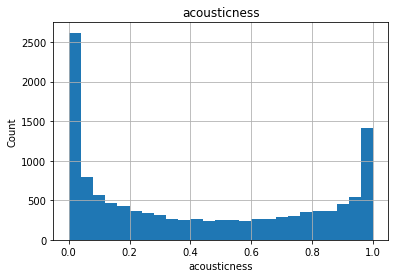

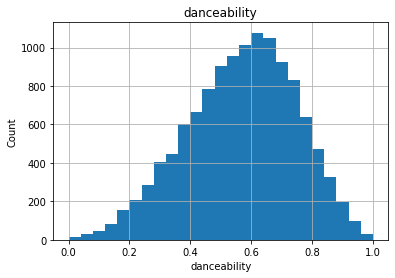

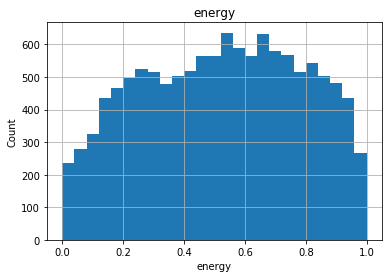

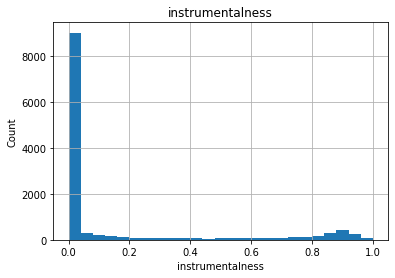

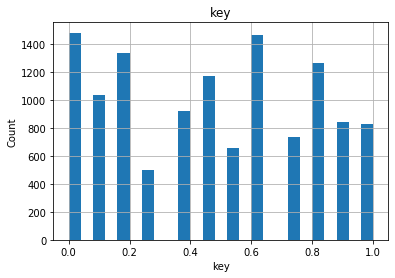

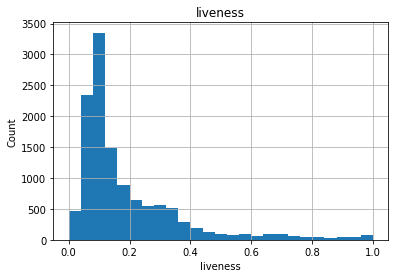

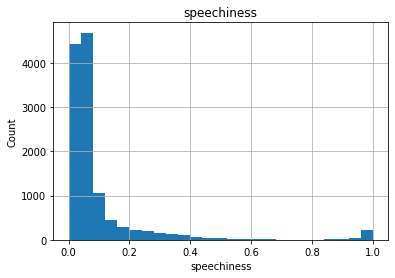

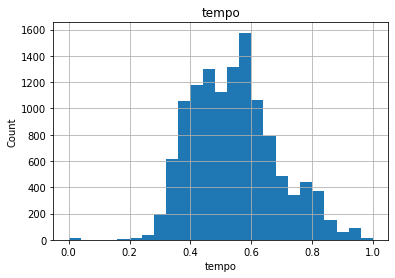

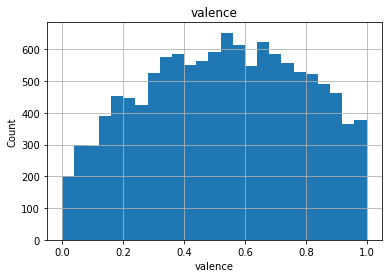

In [367]:
for feature in continuous_feature:
    data1=data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [347]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [348]:
data['popularity'] = le.fit_transform(data['popularity'])
data

,id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,speechiness,tempo,valence,year,duration-min,month,Yes,Minor
0,2015,4,0.952811,0.239796,0.027580,0.927000,0.454545,0.507279,0.039360,0.511144,0.03980,0.267327,0.038567,0.000000,0.0,0.0
1,15901,2,0.858434,0.465306,0.484990,0.088400,0.363636,0.138756,0.045145,0.701272,0.85900,0.990099,0.030303,0.909091,0.0,0.0
2,9002,4,0.830321,0.505102,0.498990,0.000000,0.000000,0.393261,0.048967,0.498075,0.70900,0.297030,0.033058,0.000000,0.0,1.0
3,6734,2,0.656626,0.656122,0.468989,0.108000,0.636364,0.206963,0.038017,0.385698,0.96400,0.534653,0.030303,0.272727,0.0,0.0
4,15563,0,0.740964,0.719388,0.310986,0.000000,0.454545,0.312837,0.050413,0.540760,0.78500,0.524752,0.044077,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0,0.040963,0.825510,0.800996,0.000000,0.090909,0.344396,0.420455,0.377877,0.74400,0.930693,0.044077,0.000000,0.0,0.0
12223,1701,3,0.915663,0.460204,0.239985,0.000002,0.090909,0.163188,0.036260,0.618000,0.70100,0.386139,0.024793,0.000000,0.0,0.0
12224,3351,2,0.329317,0.562245,0.563991,0.002950,0.181818,0.343378,0.034917,0.575914,0.89000,0.633663,0.031680,0.000000,0.0,1.0
12225,8879,1,0.122489,0.062041,0.938999,0.991000,0.090909,0.913468,0.121901,0.337728,0.00558,0.960396,0.039945,0.727273,0.0,0.0


In [349]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['popularity','id'])
Y = data['popularity']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [351]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_out=df[~((df>(Q1+1.5*IQR))|(df<(Q1-1.5*IQR))).any(axis=1)]
df_out

,id,acousticness,danceability,energy,instrumentalness,key,liveness,speechiness,tempo,valence,year,duration-min,popularity,month,Yes,Minor
4,15563,0.7380,0.705,0.311,0.000000,5,0.3220,0.0488,0.540760,0.785,1973,3.4,average,1,0,0
5,14384,0.8980,0.498,0.442,0.003190,10,0.0974,0.0337,0.505522,0.355,1968,2.6,low,1,0,0
10,2411,0.0200,0.671,0.808,0.000000,2,0.1340,0.0652,0.562416,0.637,2011,3.4,high,9,0,1
12,5068,0.0878,0.628,0.685,0.013600,7,0.0542,0.0350,0.619453,0.813,1969,3.4,low,1,0,0
14,6431,0.4260,0.615,0.831,0.000073,1,0.1840,0.0311,0.623096,0.914,1988,3.2,average,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,9367,0.1250,0.500,0.638,0.028500,2,0.1990,0.0461,0.565483,0.746,1998,4.0,average,1,0,0
12209,2980,0.4280,0.632,0.232,0.000005,9,0.2150,0.0318,0.549411,0.673,1962,2.9,high,1,0,0
12214,8425,0.2220,0.665,0.599,0.000000,7,0.1230,0.0264,0.659348,0.629,2000,2.7,high,1,0,0
12220,10864,0.2630,0.653,0.609,0.001010,11,0.2330,0.0370,0.442634,0.482,2001,3.5,high,6,0,1


In [325]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [326]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [327]:
feature_sel_model.get_support()

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True])

In [328]:
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(
#    np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 7


In [329]:
selected_feat

Index(['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'year',
       'month', 'Minor'],
      dtype='object')

In [330]:
x_train=x_train[selected_feat]
x_test=x_test[selected_feat]

In [331]:
x_train

,acousticness,instrumentalness,liveness,speechiness,year,month,Minor
10397,0.720883,0.001560,0.106179,0.035847,0.544554,0.454545,0.0
1350,0.003332,0.001010,0.767892,0.062293,0.841584,0.000000,1.0
6822,0.221887,0.737000,0.400387,0.041219,0.504950,0.272727,0.0
4734,0.012348,0.000006,0.254810,0.178719,0.811881,0.454545,0.0
5215,0.006605,0.003490,0.064441,0.073037,0.653465,0.636364,1.0
...,...,...,...,...,...,...,...
5452,0.209839,0.001440,0.905324,0.037913,0.643564,0.909091,0.0
1993,0.105421,0.000103,0.213071,0.026963,0.910891,0.818182,0.0
541,0.138553,0.000048,0.069836,0.033678,0.613861,0.000000,0.0
11868,0.019477,0.000249,0.028810,0.029649,0.712871,0.000000,0.0


In [332]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [333]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  50.122649223221586
